In [1]:
import tensorflow 

C:\Users\shivang\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\shivang\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
mnist.load_data?

Signature: mnist.load_data(path='mnist.npz')
Docstring:
Loads the [MNIST dataset](http://yann.lecun.com/exdb/mnist/).

This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
along with a test set of 10,000 images.
More info can be found at the
[MNIST homepage](http://yann.lecun.com/exdb/mnist/).


Arguments:
    path: path where to cache the dataset locally
        (relative to `~/.keras/datasets`).

Returns:
    Tuple of Numpy arrays: `(x_train, y_train), (x_test, y_test)`.

    **x_train, x_test**: uint8 arrays of grayscale image data with shapes
      (num_samples, 28, 28).

    **y_train, y_test**: uint8 arrays of digit labels (integers in range 0-9)
      with shapes (num_samples,).

License:
    Yann LeCun and Corinna Cortes hold the copyright of MNIST dataset,
    which is a derivative work from original NIST datasets.
    MNIST dataset is made available under the terms of the
    [Creative Commons Attribution-Share Alike 3.0 license.](
    https://creativecommons.

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Reshape ,Input

in_layer = Input((28,28))
flat = Reshape((784,))(in_layer)
               
d1 = Dense(units=500,activation="sigmoid")(flat)
d2 = Dense(units=100,activation="sigmoid")(d1)
d3 = Dense(units=10,activation="softmax")(d2) # since the answer is better repesented by prabability we use softmax


In [9]:
model = Model(in_layer,d3)

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               50100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train_hot = to_categorical(y_train,10)

In [17]:
y_train_hot.shape

(60000, 10)

In [19]:
model.fit(x_train,y_train_hot,epochs=10,batch_size=1000)

Epoch 1/10
60/60 [==============================] - 2s 19ms/step - loss: 0.3675 - accuracy: 0.3921
Epoch 2/10
60/60 [==============================] - 1s 18ms/step - loss: 0.2002 - accuracy: 0.8227
Epoch 3/10
60/60 [==============================] - 1s 18ms/step - loss: 0.1304 - accuracy: 0.8950
Epoch 4/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0910 - accuracy: 0.9183
Epoch 5/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0720 - accuracy: 0.9246
Epoch 6/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0597 - accuracy: 0.9322
Epoch 7/10
60/60 [==============================] - 1s 17ms/step - loss: 0.0518 - accuracy: 0.9388
Epoch 8/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0460 - accuracy: 0.9446
Epoch 9/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0424 - accuracy: 0.9469
Epoch 10/10
60/60 [==============================] - 1s 18ms/step - loss: 0.0385 - accuracy: 0.9512


In [21]:
model.predict(x_test[:10]).argmax(axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [22]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [23]:
from tensorflow.keras.preprocessing.image import load_img

In [29]:
img = load_img("../datasets/nums/one.jpeg",grayscale=True, target_size=(28,28))

C:\Users\shivang\AppData\Roaming\Python\Python37\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [30]:
img

In [32]:
import matplotlib.pyplot as plt
import numpy as np

In [33]:
np_img = np.array(img)

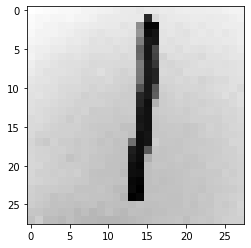

In [36]:
plt.imshow(np_img,cmap="gray")

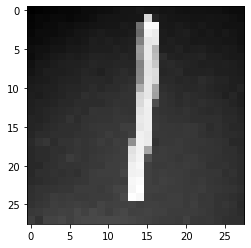

In [38]:
proc_x = 255-np_img
plt.imshow(proc_x,cmap="gray")

In [39]:
model.predict(np.array([proc_x])).argmax(axis=1)

array([3], dtype=int64)

In [ ]:
# this suggests that out model has overtrained, and the problem is due to crossentropy 